# reading and viewer nexus file data

Below are some useful snippets of code for loading in data from a nexus file, checking for keywords within the nexus file structure, and then extracting data from a path within the nexus file

In [129]:
import nexusformat.nexus as nx
import numpy as np
from nexusformat.nexus.tree import NXlink,NXdata,NXentry
import matplotlib.pyplot as plt

#Load in example dataset
nxspath='/dls/science/groups/das/ExampleData/i07/fast_rsm_example_data/si40043/i07-593344.nxs'
nxs_data=nx.nxload(nxspath)

In [134]:

#Define a checking function to printout the data paths that contain a certain string
def checkforkey(keystring,data,level=0,keypath='',level_limit=3):
    '''
    function for iteratively checking through nexus file for certain key names up to a certain depth level
    '''
    if level==level_limit:
        return
    for key in data.keys():
        keypathin="/".join([keypath,key])

        if key.find(keystring)==0:
            x=4
            print(keypathin)
        goodlist=[NXdata,NXentry]
        if type(data[key])not in goodlist:
            pass
        elif (len(data[key].keys())>=1):
            inlevel=level+1
            checkforkey(keystring,data[key],level=inlevel,keypath=keypathin)
        

In [132]:
#example of checking for string in datapaths up to level 4
checkforkey('diff1delta',nxs_data,level_limit=4)

/entry/EXCALIBUR/diff1delta_value
/entry/EXCALIBUR/diff1delta_value_set
/entry/EXCALIBUR_Region_1_sum/diff1delta_value
/entry/EXCALIBUR_Region_1_sum/diff1delta_value_set
/entry/EXCALIBUR_Region_2_sum/diff1delta_value
/entry/EXCALIBUR_Region_2_sum/diff1delta_value_set
/entry/EXCALIBUR_sum/diff1delta_value
/entry/EXCALIBUR_sum/diff1delta_value_set
/entry/adc1/diff1delta_value
/entry/adc1/diff1delta_value_set
/entry/adc2/diff1delta_value
/entry/adc2/diff1delta_value_set
/entry/adc3/diff1delta_value
/entry/adc3/diff1delta_value_set
/entry/adc4/diff1delta_value
/entry/adc4/diff1delta_value_set
/entry/d5i/diff1delta_value
/entry/d5i/diff1delta_value_set
/entry/d5xminus/diff1delta_value
/entry/d5xminus/diff1delta_value_set
/entry/d5xplus/diff1delta_value
/entry/d5xplus/diff1delta_value_set
/entry/d5yminus/diff1delta_value
/entry/d5yminus/diff1delta_value_set
/entry/d5yplus/diff1delta_value
/entry/d5yplus/diff1delta_value_set
/entry/hkl/diff1delta_value
/entry/hkl/diff1delta_value_set


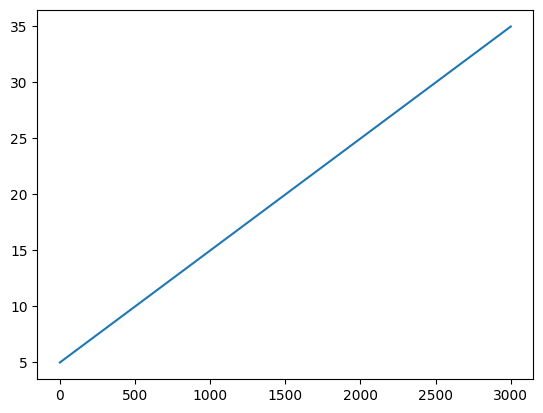

In [133]:

#extract the data into an array and then plot the data
outdata=np.array(nxs_data['/entry/EXCALIBUR_sum/diff1delta_value_set'].data)
plt.plot(outdata)